![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 002 - Part II

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 31/03/2023 | Royi Avital | First version                                                      |
|         |            |             |                                                                    |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0002Part002.ipynb)

In [ ]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
from scipy.spatial.distance import cdist
# Machine Learning

# Computer Vision
from skimage.color import rgb2lab
from skimage.io import imread
from skimage.segmentation import mark_boundaries

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [ ]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [ ]:
# Constants

DATA_FILE_URL   = r'https://github.com/FixelAlgorithmsTeam/FixelCourses/raw/master/MachineLearningMethod/16_ParametricClustering/Fruits.jpeg'
DATA_FILE_NAME  = r'Fruits.jpeg'


## Guidelines

 - Fill the full names of the team memebers in the `Team Members` section.
 - Answer all questions within the Jupyter Notebook.
 - Open questions are in part I of the exercise.
 - Coding based questions are in the subsequent notebooks.
 - Use MarkDown + MathJaX + Code to answer.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for question.
 - Good Luck!

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.

## Generate / Load Data

In [ ]:
# Download Data
# This section downloads data from the given URL if needed.

if not os.path.exists(DATA_FILE_NAME):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 6. Clustering by K-Means

### 6.1. K-Means Algorithm

In this section we'll implement 3 functions related to the K-Means:

1. `InitKMeans()` - Given a data set and number of clusters it sets the initialization of the `K-Means` algorithm.  
It should support both random initialization (Samples from data) and the [`K-Means++`](https://en.wikipedia.org/wiki/K-means%2B%2B) initialization.
2. `CalcKMeansObj()` - Given a data set and set of centroids it calculates the value of the K-Means objective function (Usually called `inertia`).  
   The objective function sum of squared distances of samples to their closest cluster center.
3. `KMeans()` - Given a data set and initialization applies the K-Means algorithm.  
The distance used in this variant is the Euclidean Distance based.

* <font color='brown'>(**#**)</font> Implementation should be efficient (Memory and operations). Total run time expected to be **less than 60 seconds**.



In [ ]:
#===========================Fill This===========================#
def InitKMeans(mX: np.ndarray, K: int, initMethod: int = 0, seedNum: int = 123) -> np.ndarray:
    '''
    K-Means algorithm initialization.
    Args:
        mX          - Input data with shape N x d.
        K           - Number of clusters.
        initMethod  - Initialization method: 0 - Random, 1 - K-Means++.
        seedNum     - Seed number used.
    Output:
        mC          - The initial centroids with shape K x d.
    Remarks:
        - Given the same parameters, including the `seedNum` the algorithm must be reproducible.
    '''

    np.random.seed(seedNum)
    if initMethod == 0:
        return mX[np.random.randint(mX.shape[0], size=K)]
    else:
        centroids = np.expand_dims(mX[np.random.randint(mX.shape[0])],axis=0)
        for i in range(K-1):
            distances = cdist(centroids, mX)
            centroid_index =np.argmax(distances.min(axis=0))
            centroids = np.vstack((centroids, mX[centroid_index]))
        return centroids

    pass
#===============================================================#

In [ ]:
#===========================Fill This===========================#
def CalcKMeansObj(mX: np.ndarray, mC: np.ndarray, vL: np.ndarray) -> float:
    '''
    K-Means algorithm.
    Args:
        mX          - The data with shape N x d.
        mC          - The centroids with shape K x d.
        vL          - The labels (0, 1, .., K - 1) per sample with shape (N, )
    Output:
        objVal      - The value of the objective function of the KMeans.
    Remarks:
        - The objective function uses the squared euclidean distance.
    '''
    centroid_per_instance = mC[vL , :]
    inertia = ((mX-centroid_per_instance)**2).sum()
    
    return inertia

#===============================================================#

In [ ]:
#===========================Fill This===========================#
def KMeans(mX: np.ndarray, mC: np.ndarray, numIter: int = 1000, stopThr: float = 0) -> np.ndarray:
    '''
    K-Means algorithm.
    Args:
        mX          - Input data with shape N x d.
        mC          - The initial centroids with shape K x d.
        numIter     - Number of iterations.
        stopThr     - Stopping threshold.
    Output:
        mC          - The final centroids with shape K x d.
        vL          - The labels (0, 1, .., K - 1) per sample with shape (N, )
        lO          - The objective value function per iterations (List).
    Remarks:
        - The maximum number of iterations must be `numIter`.
        - If the objective value of the algorithm doesn't improve by at least `stopThr` the iterations should stop.
    '''

    last_KMeansObj = 0
    lO = []
    for i in range(numIter):
        vL = cdist(mC, mX).argmin(axis=0)
        mC = np.array([mX[vL == k].mean(axis=0) for k in range(len(mC))])
        KMeansObj = CalcKMeansObj(mX, mC, vL)
        lO.append(KMeansObj)
        if (KMeansObj-last_KMeansObj) == stopThr:
            break
        last_KMeansObj = KMeansObj
    return mC, vL, lO 
#===============================================================#

### 6.2. Super Pixels

In this section we'll implement the Super Pixels segmentation algorithm.  
The basic idea of the _super pixels_ segmentation is to cluster together pixels which share similar color and location.  
Hence the features to cluster are the color values of the pixel and its coordinates.

Your code should follow:

1. Load the `Fruits.jpg` image into a NumPy array `mI` with shape `numRows x numCols x 3`.  
   The image will be downloaded into the local folder automatically by a supplied code.  
   If it doesn't work, look at the constant `DATA_FILE_NAME`.
   You may use `SciKit Image`'s `imread()` (Imported above).
2. Convert the image into the [LAB Color Space](https://en.wikipedia.org/wiki/CIELAB_color_space).  
   **No need to implement the conversion manually**.  
   You may use `SciKit Image`'s `rgb2lab()` (Imported above).
3. Create the data array `mX` with shape `(numRows * numCols) x 5`.  
   The features should include the LAB values and the row / column coordinates of each pixel.
4. Scale the columns of data in a reasonable manner.
5. Apply the K-Means algorithm on the data with `K-Means++` initialization.  
   Set a reasonable number of clusters (Trial and error).
   Set the parameters of the algorithm such that the algorithm stops on convergence (No change in centroids).
6. Create a mask of the labels of the pixels at the size of the image.  
   Display the results using `SciKit Image`'s `mark_boundaries()` (Imported above).
7. Display the segmentation result.
8. Display the objective function per iteration. Including the initialization.

The output should look similar to:

![](https://i.imgur.com/BS6sVXc.png)

* <font color='brown'>(**#**)</font> Use different cells per steps.
* <font color='brown'>(**#**)</font> Optimize the weights (Scaling).

In [ ]:
#===========================Fill This===========================#
# 1. Load Image into `mI`.
# 2. Convert to LAB (`mILab`).
image = imread("Fruits.jpeg")
converted_image = rgb2lab(image)
#===============================================================#

In [ ]:
#===========================Fill This===========================#
# 1. Generate `mX` from `mILab`.
# 2. Scale its columns in a reasonable way.
im_lab = converted_image.reshape(-1, 3)
im_lab = (im_lab - im_lab.mean(axis=0)) / im_lab.std(axis=0)
index_grid=np.indices(image.shape[:2]).reshape(2,-1).T
index_grid = (index_grid - index_grid.mean(axis=0)) / index_grid.std(axis=0)

color2location_factor = 0.35
mX = np.concatenate([color2location_factor*im_lab,index_grid] ,axis=1)

#===============================================================#

In the previous cell we normalized the color features and the location features separately. We can then play with the relative weight of the features to reach the desired result.\
Parameter setting was done starting with most weight on pixel location and enough clusters to cover the objects. Then the color weight was increased until reasonable clustering was reached. It is possible to do it differently of course.

In [ ]:
#===========================Fill This===========================#
# 1. Apply K-Means clustering on `mX`.
# 2. Build the mask from the labels.p
k = 34
mC= InitKMeans(mX, K=k, initMethod = 1, seedNum= 123)
mC, vL, lO = KMeans(mX, mC, numIter=100)



#===============================================================#

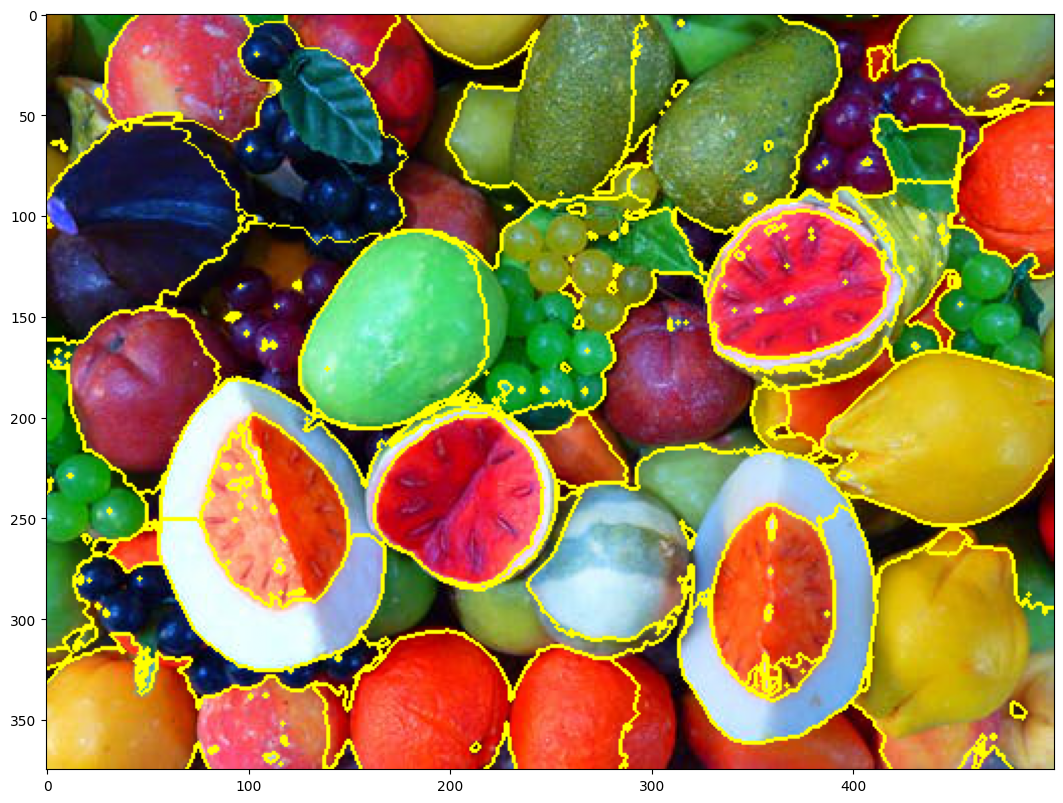

In [ ]:
#===========================Fill This===========================#
# 1. Generate the super pixel boundaries form the mask.
# 2. Display the results (Super Pixels Image, Objective function vs. iteration).

# Make sure to show the objective function of the initialization in the graph.
plt.figure(figsize=(13,13))
plt.imshow(mark_boundaries(image, vL.reshape(image.shape[:2])));

#===============================================================#

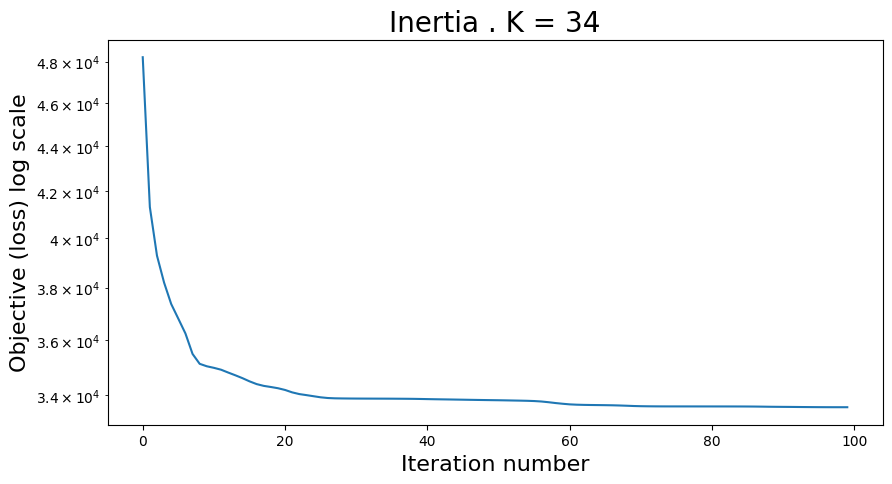

In [ ]:
figure, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

ax.set_title(f'Inertia . K = {k}', fontsize=20)
ax.set_ylabel("Objective (loss) log scale", fontsize=16)
ax.set_xlabel("Iteration number", fontsize=16)
ax.set_yscale('log')
ax.plot(lO)